<a href="https://colab.research.google.com/github/Kaua-Rbs/Deep-Learning-From-A-To-Z-With-Pytorch-And-Python/blob/main/Project_1_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1: Binary Classification: Breast Cancer

##Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
import torch
torch.__version__

'2.3.0+cu121'

In [ ]:
import torch.nn as nn

##Database

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

In [ ]:
previsores.shape

(569, 30)

In [ ]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [ ]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
np.unique(classe)

array([0, 1])

<Axes: xlabel='0', ylabel='count'>

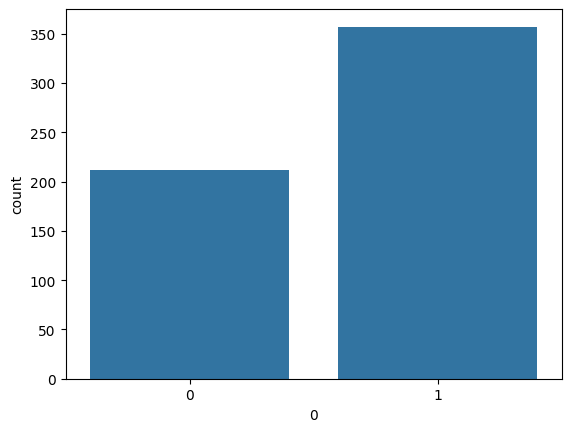

In [ ]:
sns.countplot(x='0', data=classe)

In [ ]:
previsores_train, previsores_test, classe_train, classe_test = train_test_split(previsores, classe, test_size=0.25)

In [ ]:
previsores_train.shape

(426, 30)

In [ ]:
classe_train.shape

(426, 1)

In [ ]:
previsores_test.shape

(143, 30)

In [ ]:
classe_test.shape

(143, 1)

##Transforming The Data Into Tensors

In [ ]:
type(previsores_train)

pandas.core.frame.DataFrame

In [ ]:
type(np.array(previsores_train))

numpy.ndarray

In [ ]:
previsores_train = torch.tensor(np.array(previsores_train), dtype=torch.float)
classe_train = torch.tensor(np.array(classe_train), dtype=torch.float)

In [ ]:
type(previsores_train)

torch.Tensor

In [ ]:
type(classe_train)

torch.Tensor

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores_train, classe_train)

In [ ]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

##Model Structuring

In [ ]:
classificador = nn.Sequential(
      nn.Linear(in_features=30, out_features=16),
      nn.ReLU(),
      nn.Linear(16, 16),
      nn.ReLU(),
      nn.Linear(16,1),
      nn.Sigmoid()
  )

In [ ]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
criterion = nn.BCELoss()

In [ ]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

##Model Training

In [ ]:
for epoch in range(100):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data
    optimizer.zero_grad()

    outputs =classificador(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('época %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))

época   1: perda 10.77345
época   2: perda 6.62567
época   3: perda 1.89806
época   4: perda 1.59329
época   5: perda 1.32931
época   6: perda 0.71823
época   7: perda 0.59802
época   8: perda 0.57102
época   9: perda 0.35956
época  10: perda 0.39259
época  11: perda 0.55423
época  12: perda 0.55269
época  13: perda 0.32078
época  14: perda 0.32962
época  15: perda 0.35974
época  16: perda 0.31069
época  17: perda 0.24535
época  18: perda 0.27538
época  19: perda 0.27022
época  20: perda 0.27187
época  21: perda 0.25322
época  22: perda 0.25163
época  23: perda 0.46141
época  24: perda 0.26000
época  25: perda 0.25707
época  26: perda 0.25918
época  27: perda 0.26340
época  28: perda 0.24367
época  29: perda 0.19483
época  30: perda 0.19469
época  31: perda 0.21671
época  32: perda 0.20377
época  33: perda 0.20521
época  34: perda 0.20883
época  35: perda 0.18433
época  36: perda 0.18320
época  37: perda 0.22316
época  38: perda 0.22011
época  39: perda 0.19368
época  40: perda 0.17976

##Weights Visualization

In [ ]:
params = list(classificador.parameters())

In [ ]:
params

[Parameter containing:
 tensor([[-1.2691e-01, -6.8145e-02, -1.4388e-01,  4.8714e-02, -1.5032e-01,
           6.7362e-02, -1.4546e-01, -1.5058e-01, -2.5787e-01,  4.1507e-01,
           1.8589e-02,  5.0616e-03, -1.1239e-01, -6.9343e-02,  2.3423e-03,
          -3.4580e-01, -2.3883e-01,  6.3986e-02,  3.4740e-02, -2.5572e-04,
           1.4218e-01, -6.7682e-02, -1.6082e-02,  1.4359e-01,  1.5469e-01,
           6.1422e-02, -2.0164e-01,  3.9941e-02,  4.2040e-01,  1.7568e-01],
         [ 1.8580e-01,  2.2519e-01,  2.9253e-01,  8.9745e-02, -7.0512e-02,
          -1.4073e-01, -4.3927e-02, -9.6294e-02, -4.0644e-02,  2.8109e-01,
          -4.1117e-02, -1.1178e-01, -4.2997e-03,  1.8198e-01, -5.0714e-03,
          -8.9985e-02, -1.7268e-02,  2.0036e-01,  1.8109e-01, -1.2496e-02,
           9.0950e-02,  8.0253e-02,  1.9381e-01,  1.0279e-04, -2.7417e-02,
          -2.2569e-01, -2.2710e-01, -1.8728e-02, -7.6951e-02, -1.5178e-01],
         [ 1.3042e-02,  1.1286e-02, -2.4358e-01, -1.0810e-01, -3.0802e-02,


In [ ]:
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [ ]:
print(pesos0)

Parameter containing:
tensor([[-1.2691e-01, -6.8145e-02, -1.4388e-01,  4.8714e-02, -1.5032e-01,
          6.7362e-02, -1.4546e-01, -1.5058e-01, -2.5787e-01,  4.1507e-01,
          1.8589e-02,  5.0616e-03, -1.1239e-01, -6.9343e-02,  2.3423e-03,
         -3.4580e-01, -2.3883e-01,  6.3986e-02,  3.4740e-02, -2.5572e-04,
          1.4218e-01, -6.7682e-02, -1.6082e-02,  1.4359e-01,  1.5469e-01,
          6.1422e-02, -2.0164e-01,  3.9941e-02,  4.2040e-01,  1.7568e-01],
        [ 1.8580e-01,  2.2519e-01,  2.9253e-01,  8.9745e-02, -7.0512e-02,
         -1.4073e-01, -4.3927e-02, -9.6294e-02, -4.0644e-02,  2.8109e-01,
         -4.1117e-02, -1.1178e-01, -4.2997e-03,  1.8198e-01, -5.0714e-03,
         -8.9985e-02, -1.7268e-02,  2.0036e-01,  1.8109e-01, -1.2496e-02,
          9.0950e-02,  8.0253e-02,  1.9381e-01,  1.0279e-04, -2.7417e-02,
         -2.2569e-01, -2.2710e-01, -1.8728e-02, -7.6951e-02, -1.5178e-01],
        [ 1.3042e-02,  1.1286e-02, -2.4358e-01, -1.0810e-01, -3.0802e-02,
          1.36

In [ ]:
bias0 = params[1]
bias0.shape

torch.Size([16])

In [ ]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [ ]:
bias1 = params[3]
bias1.shape

torch.Size([16])

##Model Evaluation

In [ ]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
type(previsores_test)

pandas.core.frame.DataFrame

In [ ]:
previsores_test = torch.tensor(np.array(previsores_test), dtype=torch.float)

In [ ]:
type(previsores_test)

torch.Tensor

In [ ]:
previsoes = classificador(previsores_test)

In [ ]:
previsoes

tensor([[9.5697e-01],
        [1.0000e+00],
        [2.2287e-02],
        [9.8567e-01],
        [2.3739e-05],
        [6.3560e-01],
        [8.9823e-01],
        [9.9994e-01],
        [6.1136e-01],
        [4.5702e-01],
        [9.7953e-01],
        [9.9561e-01],
        [9.9998e-01],
        [9.7363e-01],
        [9.8123e-01],
        [6.3703e-01],
        [9.5512e-01],
        [1.0000e+00],
        [6.0816e-01],
        [9.9927e-01],
        [7.0232e-13],
        [4.7796e-03],
        [3.1601e-01],
        [1.0000e+00],
        [7.7158e-01],
        [9.7469e-04],
        [2.9989e-01],
        [1.0000e+00],
        [4.7244e-05],
        [9.8452e-01],
        [1.0342e-01],
        [1.0000e+00],
        [9.2647e-01],
        [9.0535e-01],
        [3.9962e-02],
        [9.8564e-01],
        [2.0786e-01],
        [9.9845e-01],
        [9.9997e-01],
        [2.0826e-05],
        [1.8295e-03],
        [6.2906e-01],
        [1.6008e-07],
        [2.5814e-01],
        [4.1453e-05],
        [5

In [ ]:
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [ ]:
taxa_acerto = accuracy_score(classe_test, previsoes)
taxa_acerto

0.9020979020979021

In [ ]:
matriz = confusion_matrix(classe_test, previsoes)
matriz

array([[46,  8],
       [ 6, 83]])

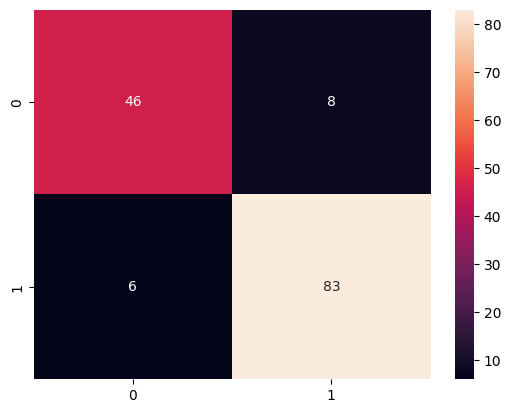

In [ ]:
sns.heatmap(matriz, annot=True);